# Quick intro

This is a quick jab at the technical stage of the [SciCrop](https://scicrop.com/?lang=en "SciCrop's Homepage") selection process
As I had only 5 hours on the deadline date to work on this project (the week before the deadline was a rly busy one) the aproach was quick and lean, without much of EDA and most of the time trying to make sense of the data and the problem (as +- 1 hour was used to write the markdown text)

The README describing the problem can be found on 'Test_repo_Readme' directory.

In the end this will be on my github and eventualy part of a portfolio (at this moment still getting the hang of data science), so I will continue this project on a latter date (the README is in portuguese, but will translate it to english when I get back to it).

This notebook presents how I started exploring the problem and the dataset. 

---

# EDA

Always, the first thing to do is to import the dataset and checkup on it's size, types and health (one EDA a day keeps the bugs away)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_18_19 = pd.read_csv('./datasets/Safra_2018-2019.csv', index_col=0) 

In [3]:
display(df_18_19.head())
display(df_18_19.sample(5))

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1


,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
6524,SCROP06525,531,0,1,2,50,17.0,12,3,0
34156,SCROP34157,1898,0,0,2,15,20.0,30,2,0
56711,SCROP56712,531,0,0,2,5,NaN,0,3,0
76055,SCROP76056,1478,1,0,2,20,23.0,19,1,0
59583,SCROP59584,1785,0,0,2,20,19.0,25,2,0


looks good, not many columns, and one is just a fancier index. 

In [4]:
df_18_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identificador_Agricultor  80000 non-null  object 
 1   Estimativa_de_Insetos     80000 non-null  int64  
 2   Tipo_de_Cultivo           80000 non-null  int64  
 3   Tipo_de_Solo              80000 non-null  int64  
 4   Categoria_Pesticida       80000 non-null  int64  
 5   Doses_Semana              80000 non-null  int64  
 6   Semanas_Utilizando        71945 non-null  float64
 7   Semanas_Sem_Uso           80000 non-null  int64  
 8   Temporada                 80000 non-null  int64  
 9   dano_na_plantacao         80000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.7+ MB


In [5]:
df_18_19.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000,80000.000000
mean,1400.020875,0.283338,0.455550,2.267587,25.846750,28.664480,9.549088,1.897575,0.192312
std,849.792471,0.450622,0.498023,0.463748,15.557246,12.424751,9.905547,0.702079,0.455912
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


ok, we need to properly label the categorical columns, but before that let's check the target variable, to see what a dumb classifier max accuracy would be.

In [6]:
df_18_19.dano_na_plantacao.value_counts()

0    66716
1    11183
2     2101
Name: dano_na_plantacao, dtype: int64

In [7]:
df_18_19[df_18_19.dano_na_plantacao == 0].shape[0]/df_18_19.shape[0]

0.83395

Well, that is a skewed dataset, looks like there isn't much cases of crop damage caused by pesticide overdose. 

Let's properly set the categorical columns

In [8]:
df_18_19['Tipo_de_Cultivo'] = df_18_19.Tipo_de_Cultivo.astype('category')
df_18_19['Tipo_de_Solo'] = df_18_19.Tipo_de_Solo.astype('category')
df_18_19['Categoria_Pesticida'] = df_18_19.Categoria_Pesticida.astype('category')
df_18_19['Temporada'] = df_18_19.Temporada.astype('category')
df_18_19['dano_na_plantacao'] = df_18_19.dano_na_plantacao.astype('category')

In [9]:
df_18_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Identificador_Agricultor  80000 non-null  object  
 1   Estimativa_de_Insetos     80000 non-null  int64   
 2   Tipo_de_Cultivo           80000 non-null  category
 3   Tipo_de_Solo              80000 non-null  category
 4   Categoria_Pesticida       80000 non-null  category
 5   Doses_Semana              80000 non-null  int64   
 6   Semanas_Utilizando        71945 non-null  float64 
 7   Semanas_Sem_Uso           80000 non-null  int64   
 8   Temporada                 80000 non-null  category
 9   dano_na_plantacao         80000 non-null  category
dtypes: category(5), float64(1), int64(3), object(1)
memory usage: 4.0+ MB


Looks good, the 'Categoria_Pesticida' columns could've been treated as a ordered category, but as the 'Doses_Semana' and 'Semanas_Utilizando' columns already give an pseudo ordering for the models, we don't rly need to do it, but for model tunning is a good thing to remember

Lets start preparing the dataset already, first let's drop the second index, we wont need it

In [10]:
df_18_19.drop('Identificador_Agricultor', axis=1, inplace=True)

Now let's see if we can just drop the 'Semanas_Utilizando' na values, lets see if we would skew our data even more

In [11]:
df_18_19[df_18_19.Semanas_Utilizando.isna()].Categoria_Pesticida.value_counts()

2    5776
3    2191
1      88
Name: Categoria_Pesticida, dtype: int64

In [12]:
df_18_19.Categoria_Pesticida.value_counts()

2    57067
3    22170
1      763
Name: Categoria_Pesticida, dtype: int64

Nope, looks good, dropped.

In [13]:
df = df_18_19.dropna()

Let's new check the correlation of our target, so we can know what to expect from the logistic regression coefficients

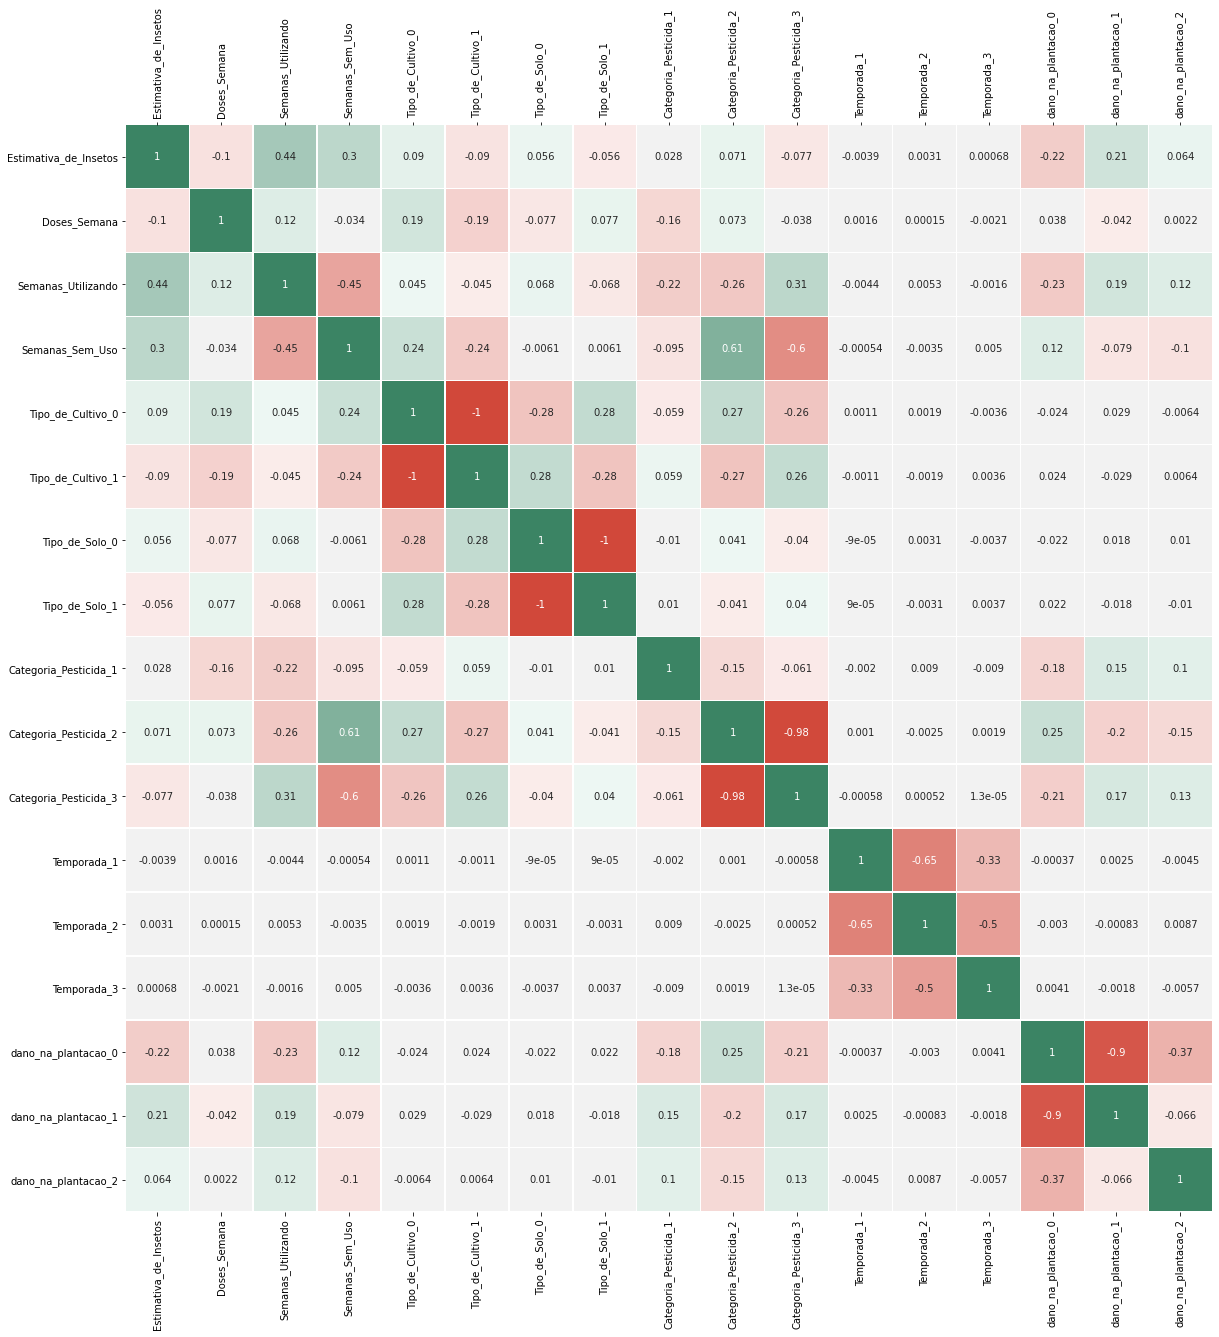

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(pd.get_dummies(df_18_19).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=ax)
ax.tick_params(top=True,labeltop=True)
plt.xticks(rotation='vertical')
plt.show()

Well, some quick insights can be gathered from here:

1. The crop and soil tipes and the weather doesn't rly matter much for the target variable on this case.
2. The damage caused by pesticides isn't correlated with the expected number of insects, this means that most of the time the pesticide damage could be prevented by a simple binary classifier predicting if the use of pesticides are rly needed, but to be sure a more in depth analysis is needed

And a quick note, there are cases of crops that never used pesticides and had damage caused by pesticides O.o
Or that is a miss input or that rly can happen, in any case that is something that should be looked into, as it can add some bias on the model, for this case we will treat as all the info on the dataset as true (can pesticides be carried by wind? stay on seeds even after they are planted? mby it was on the soil? so many questions, need to google about that latter)

In [15]:
df_18_19[(df_18_19.Categoria_Pesticida == 1) & (df_18_19.dano_na_plantacao == 2)]

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
7,577,1,0,1,0,0.0,0,1,2
9,1132,1,0,1,0,0.0,0,1,2
14,1575,1,1,1,0,0.0,0,2,2
2585,2267,0,0,1,0,0.0,0,2,2
2590,3896,1,0,1,0,0.0,0,1,2
...,...,...,...,...,...,...,...,...,...
78655,2541,1,0,1,0,0.0,0,1,2
78659,2999,1,1,1,0,0.0,0,2,2
78662,3164,1,0,1,0,NaN,0,2,2
78665,3896,1,0,1,0,NaN,0,1,2


But the problem of this dataset is defined as predicting the case of pesticide damage too, as the current year data is already present, so lets try to predict it.

---

# Testing some quick models

First let's just fit a simple logistic regression, as the dataset is heavily skewed a random forest would be a best fit, but it's always good to use first a more clear model, so we can get a hang of what features are rly being used

In [16]:
y = df.dano_na_plantacao
X = pd.get_dummies(df.drop('dano_na_plantacao', axis=1))

In [17]:
from sklearn.preprocessing import scale

In [18]:
X_columns = X.columns
X = scale(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=345)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg = LogisticRegression(multi_class='ovr')

In [23]:
from sklearn.model_selection import cross_validate

In [24]:
lg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [25]:
lg.score(X_train, y_train)

0.8388236929369949

In [26]:
lg.score(X_test, y_test)

0.8333024462564863

Well, it's for sure not overfitting, but let's take a closer look, as the accuracy is too close of a dumb classifier, and the case 2 is rly undersampled.

In [27]:
y_pred = lg.predict(X_test)

In [28]:
(y_pred == 2).sum()

0

well, yep, that does not look good

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(data= cf_m, columns=['pred_0', 'pred_1', 'pred_2'], index= ['real_0', 'real_1', 'real_2'])

,pred_0,pred_1,pred_2
real_0,17614,326,0
real_1,2676,372,0
real_2,487,109,0


yeah, the model is just treating the case 2 as subsets of case 1, what we expected, as they are heavily correlated with use of pesticides, but I hoped that the expected insects feature would pull it's weight on separating the cases 1 and 2...

let's use what logistic regressiong gives us, let's look at the coefs.

In [31]:
pd.DataFrame(data = lg.coef_, columns=X_columns, index=['0','1','2'])

,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Tipo_de_Cultivo_0,Tipo_de_Cultivo_1,Tipo_de_Solo_0,Tipo_de_Solo_1,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3,Temporada_1,Temporada_2,Temporada_3
0,-0.288691,-0.000965,-0.594642,-0.361219,-0.112322,0.112322,-0.049812,0.049812,-0.510304,0.409185,-0.303482,-0.005045,0.003155,0.001854
1,0.290954,-0.034485,0.508936,0.355613,0.105989,-0.105989,0.045403,-0.045403,0.384823,-0.357288,0.278070,0.013316,-0.011098,-0.001434
2,0.033639,0.182681,0.730228,0.098702,0.050710,-0.050710,0.028284,-0.028284,0.453079,-0.356403,0.262483,-0.036497,0.036384,-0.003527


well, the expected number of insects rly can diferentiate them, but the number of weeks on pesticides is covering it up, the best action would be to first predict if it will be damaged, to then predict the type of damage

but let's just try to hack it quickly (I don't got much time) using class weights, so we can force the model to try predicting the case 2

In [32]:
lg = LogisticRegression(multi_class='ovr', class_weight='balanced')

In [33]:
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [34]:
lg.score(X_train, y_train)

0.6716109688052263

In [35]:
lg.score(X_test, y_test)

0.6732765011119348

In [36]:
cf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(data= cf_m, columns=['pred_0', 'pred_1', 'pred_2'], index= ['real_0', 'real_1', 'real_2'])

,pred_0,pred_1,pred_2
real_0,13062,2848,2030
real_1,964,1182,902
real_2,113,195,288


ok, it's too skewed on the 2 and it shares most of the features with 1, so we forced it too much, let's try to quickly get the weights manualy

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {'multi_class':['ovr'],
          'class_weight':[{0:x, 1:y, 2:z} for x in map(lambda x:x/10, range(1,8)) for y in map(lambda x:x/10, range(1,8)) for z in map(lambda x:x/10, range(1,8)) if x+y+z == 1]}

In [39]:
clf = GridSearchCV(lg,params, n_jobs=-1, verbose=1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_.score(X_test, y_test)

In [ ]:
y_pred = clf.best_estimator_.predict(X_test)

In [ ]:
cf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(data= cf_m, columns=['pred_0', 'pred_1', 'pred_2'], index= ['real_0', 'real_1', 'real_2'])

ok we got our weight for the case 0, now let's just manualy set the ones for 1 and 2 (this is a trial and error step, so I will just set them for the best I got, so this notebook is not full of repeated code, more than it already is)

In [ ]:
lg = LogisticRegression(multi_class='ovr', class_weight={0: 0.4, 1: 0.15, 2: 0.45})
lg.fit(X_train, y_train)

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
cf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(data= cf_m, columns=['pred_0', 'pred_1', 'pred_2'], index= ['real_0', 'real_1', 'real_2'])

In [ ]:
lg.score(X_test, y_test)

In [ ]:
pd.DataFrame(data = lg.coef_, columns=X_columns, index=['0','1','2'])

and we got it, it's bad, like, rly bad, but I can't expect perfection without putting the time in. (well I can hope, but that doesn't rly do it)

now that we got the weights and a idea of the problem, let's just fit a random forest, as it's the best quick to tune model for this type of classification

(again I don't have the time to do a big grid search, and as random forests are prone to overfitting I will tune it quickly by hand, it will not be the best, but it's what I have)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, class_weight={0: 0.4, 1: 0.15, 2: 0.45})

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
cf_m = confusion_matrix(y_test, y_pred)
pd.DataFrame(data= cf_m, columns=['pred_0', 'pred_1', 'pred_2'], index= ['real_0', 'real_1', 'real_2'])

not overfitting, the best precision we got for case 2 yet, welp that is it, for the time I had, it is what it is

In [ ]:
df_2020 = pd.read_csv('./datasets/Safra_2020.csv', index_col=0)

In [ ]:
df_2020['Tipo_de_Cultivo'] = df_2020.Tipo_de_Cultivo.astype('category')
df_2020['Tipo_de_Solo'] = df_2020.Tipo_de_Solo.astype('category')
df_2020['Categoria_Pesticida'] = df_2020.Categoria_Pesticida.astype('category')
df_2020['Temporada'] = df_2020.Temporada.astype('category')

In [ ]:
df_2020.info()

we could try to fill the missing values using various methods, but for time considerations lets just do a quick groupby and fill with the mean

In [ ]:
values_to_fill = list(df_2020.groupby('Categoria_Pesticida').Semanas_Utilizando.mean())
values_to_fill

In [ ]:
for x in range(3):
    df_2020.loc[df_2020.Categoria_Pesticida == x+1,'Semanas_Utilizando'] = df_2020.loc[df_2020.Categoria_Pesticida == x+1,'Semanas_Utilizando'].fillna(values_to_fill[x])

In [ ]:
X_2020 = scale(pd.get_dummies(df_2020.drop('Identificador_Agricultor', axis=1)))

In [ ]:
lg_predictions = pd.Series(lg.predict(X_2020))

In [ ]:
lg_predictions.value_counts()

In [ ]:
rf_predictions = pd.Series(rf.predict(X_2020))

In [ ]:
rf_predictions.value_counts()

well looks like it's overpredicting 0, and the linear regression and the random forest aren't predicting the same for most of the cases, and there are some rly strange cases, but for quickly put toguether models, they did their best ^^

In [ ]:
df_2020 = pd.read_csv('./datasets/Safra_2020.csv', index_col=0)

In [ ]:
df_2020['dano_na_plantacao_predicted'] = lg.predict(X_2020)

In [ ]:
df_2020.to_csv('./datasets/Safra_2020_predicted.csv')

---

# Closing thoughts

The dataset was a fun sunday afternoon project, the things I still need to do when I revisit this dataset:

* Try some more advanced models, that take more time to do a fine tunning
* Try to separate the predictions, to understand better what differs on the 1 and 2 cases
* Get a better understanding about the problem, googling how the pesticides can cause damage on the crops, and do a more robust EDA, this one was too much superficial